<a href="https://colab.research.google.com/github/Nckflannery/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module3-make-explanatory-visualizations/LS_DS_123_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












##Part 1

###Replicate first graph

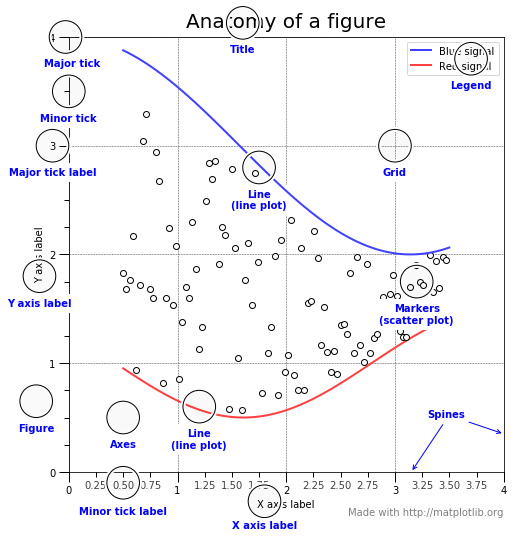

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

np.random.seed(19680801)

X = np.linspace(0.5, 3.5, 100)
Y1 = 3+np.cos(X)
Y2 = 1+np.cos(1+X/0.75)/2
Y3 = np.random.uniform(Y1, Y2, len(X))

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, aspect=1)

def minor_tick(x, pos):
  if not x % 1.0:
    return ""
  return "%.2f" % x

ax.xaxis.set_major_locator(MultipleLocator(1.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_minor_formatter(FuncFormatter(minor_tick))

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

ax.tick_params(which='major', width=1.0)
ax.tick_params(which='major', length=10)
ax.tick_params(which='minor', width=1.0, labelsize=10)
ax.tick_params(which='minor', length=5, labelsize=10, labelcolor='0.25')

ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

ax.plot(X, Y1, c=(0.25, 0.25, 1.00), lw=2, label="Blue signal", zorder=10)
ax.plot(X, Y2, c=(1.00, 0.25, 0.25), lw=2, label="Red signal")
ax.plot(X, Y3, linewidth=0,
        marker='o', markerfacecolor='w', markeredgecolor='k')

ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment='bottom')
ax.set_xlabel("X axis label")
ax.set_ylabel("Y axis label")

ax.legend()


def circle(x, y, radius=0.15):
    from matplotlib.patches import Circle
    from matplotlib.patheffects import withStroke
    circle = Circle((x, y), radius, clip_on=False, zorder=10, linewidth=1,
                    edgecolor='black', facecolor=(0, 0, 0, .0125),
                    path_effects=[withStroke(linewidth=5, foreground='w')])
    ax.add_artist(circle)


def text(x, y, text):
    ax.text(x, y, text, backgroundcolor="white",
            ha='center', va='top', weight='bold', color='blue')

# Minor tick
circle(0.50, -0.10)
text(0.50, -0.32, "Minor tick label")

# Major tick
circle(-0.03, 4.00)
text(0.03, 3.80, "Major tick")

# Minor tick
circle(0.00, 3.50)
text(0.00, 3.30, "Minor tick")

# Major tick label
circle(-0.15, 3.00)
text(-0.15, 2.80, "Major tick label")

# X Label
circle(1.80, -0.27)
text(1.80, -0.45, "X axis label")

# Y Label
circle(-0.27, 1.80)
text(-0.27, 1.6, "Y axis label")

# Title
circle(1.60, 4.13)
text(1.60, 3.93, "Title")

# Blue plot
circle(1.75, 2.80)
text(1.75, 2.60, "Line\n(line plot)")

# Red plot
circle(1.20, 0.60)
text(1.20, 0.40, "Line\n(line plot)")

# Scatter plot
circle(3.20, 1.75)
text(3.20, 1.55, "Markers\n(scatter plot)")

# Grid
circle(3.00, 3.00)
text(3.00, 2.80, "Grid")

# Legend
circle(3.70, 3.80)
text(3.70, 3.60, "Legend")

# Axes
circle(0.5, 0.5)
text(0.5, 0.3, "Axes")

# Figure
circle(-0.3, 0.65)
text(-0.3, 0.45, "Figure")

color = 'blue'
ax.annotate('Spines', xy=(4.0, 0.35), xytext=(3.3, 0.5),
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.annotate('', xy=(3.15, 0.0), xytext=(3.45, 0.45),
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))

ax.text(4.0, -0.4, "Made with http://matplotlib.org",
        fontsize=10, ha="right", color='.5')

plt.show()

###Replicate IMDB graph

In [0]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)

display(example)

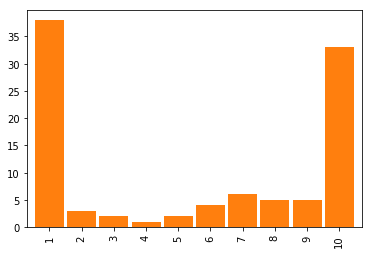

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


#plt.style.use('fivethirtyeight')

fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33], 
                 index=range(1,11))

fake.plot.bar(color='C1', width=0.9);

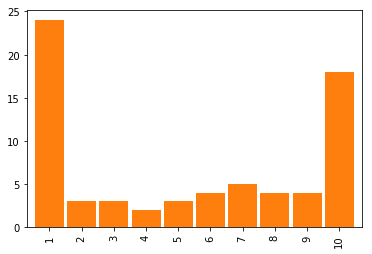

In [0]:
fake2 = pd.Series(
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     2, 2, 2, 
     3, 3, 3,
     4, 4,
     5, 5, 5,
     6, 6, 6, 6,
     7, 7, 7, 7, 7,
     8, 8, 8, 8,
     9, 9, 9, 9, 
     10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

fake2.value_counts().sort_index().plot.bar(color='C1', width=0.9);

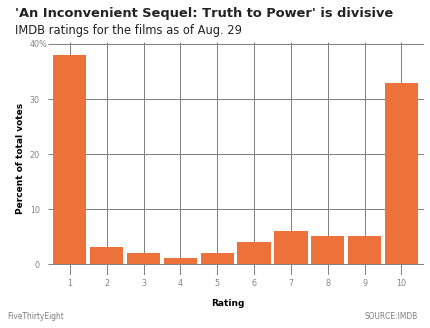

In [0]:
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

# Generate our Figure
fig = plt.figure()

# Add title in Figure
###fig.suptitle('Test Title')


# Generate our Axes (Center section)
ax = fake.plot.bar(color='#ED713A', width=0.9)

# Make transparent
fig.patch.set(alpha=0)
ax.patch.set(alpha=0)
# Set Title in axes
###ax.set_title('Title')

# Fix grid color
ax.grid(color='#828282')

#Hide outer grid lines and thin bottom line
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.text(x=-1.1, y=39.5, s='40%', color='#858585', size=8)
ax.text(x=-1.5,y=45,s="'An Inconvenient Sequel: Truth to Power' is divisive", fontweight='bold', fontsize=13, color='#232323');
ax.text(x=-1.5, y=42, s='IMDB ratings for the films as of Aug. 29', fontsize=11.5, color='#232323');

ax.text(x=-1.7, y=-10, s='FiveThirtyEight', size=7.5, color='#7E7E7E')
ax.text(x=8, y=-10, s='SOURCE:IMDB', size=7.5, color='#7E7E7E', family='sans-serif')

# Set Axis labels (These are just text objects that have been rotated)
ax.set_xlabel('Rating', fontsize=9, fontweight='bold', labelpad=5);
ax.set_ylabel('Percent of total votes', fontsize=9, fontweight='bold', labelpad=5);
ax.xaxis.set_label_coords(x=.48, y=-.1, transform=None)

# Fix our tick labels
ax.set_xticks(range(0,10))
ax.set_xticklabels(range(1, 11), rotation=0, color='#858585', size=8)
ax.set_yticks(range(0, 50, 10))
ax.set_yticklabels(labels=['0', '10', '20', '30'], color='#858585', size=8, ha='right')
ax.tick_params(axis='y', pad=8)

ax.set_xlim(-.6,9.6)
ax.set_ylim(-2, 40.5)

plt.show()

In [0]:
#For Reference
display(example)

##Reproduce an example from FiveThirtyEight

In [0]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2015/08/hickey-datalab-dailyshow.png?w=575'
example1 = Image(url=url)

display(example1)

In [0]:
import pandas as pd

data_url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/daily-show-guests/daily_show_guests.csv'
df = pd.read_csv(data_url)

In [0]:
df['Group'].value_counts()

Acting            930
Media             751
Politician        308
Comedy            150
Musician          123
Academic          103
Athletics          52
Misc               45
Government         40
Political Aide     36
Science            28
Business           25
Advocacy           24
Consultant         18
Military           16
Clergy              8
media               5
Name: Group, dtype: int64

In [0]:
# Combine Acting Comedy and Musicians
df['Group'] = df['Group'].replace(['Acting', 'Comedy', 'Musician'] , 'Acting, Comedy & Musician')
df['Group'] = df['Group'].replace(['Politician', 'Government', 'Political Aide', 'Military'], 'Government and Politics')
df['Group'] = df['Group'].replace(['Media', 'media'] , 'Media')

In [0]:
# Drop categories I don't need
df = df[['YEAR', 'Group']]

In [0]:
ToS = df['Group'].value_counts().rename_axis('Group').reset_index(name='Times on Show')

In [0]:
condition = ToS['Times on Show'] > 200
df1 = ToS[condition]

In [0]:
merged = pd.merge(df, df1['Group'], how='inner', on='Group')

In [0]:
crosstab = pd.crosstab(merged['YEAR'], merged['Group'], normalize='index')

In [0]:
crosstab

Group,"Acting, Comedy & Musician",Government and Politics,Media
YEAR,,,
1999,0.920245,0.012270,0.067485
2000,0.781250,0.087500,0.131250
2001,0.754967,0.039735,0.205298
2002,0.651316,0.072368,0.276316
2003,0.615894,0.112583,0.271523
2004,0.434483,0.255172,0.310345
2005,0.425532,0.191489,0.382979
2006,0.423358,0.233577,0.343066
2007,0.327273,0.245455,0.427273


<Figure size 432x288 with 0 Axes>

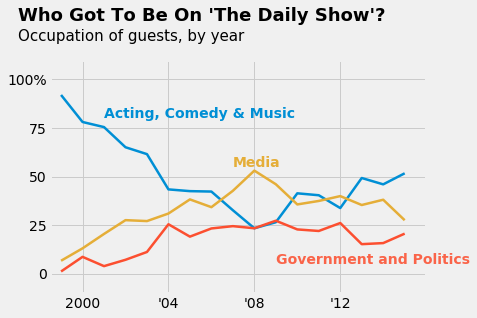

In [0]:
plt.style.use('fivethirtyeight')

# Generate our Figure
fig = plt.figure()

# Generate our Axes (Center section)
ax = crosstab.plot(kind='line', lw=2.5)

ax.legend().set_visible(False)

ax.text(x=1997, y= 1.3, s="Who Got To Be On 'The Daily Show'?", fontweight='bold', fontsize=18)
ax.text(x=1997, y=1.2, s='Occupation of guests, by year', fontsize= 15)

ax.text(x=2001, y=.8, s='Acting, Comedy & Music', fontweight='bold', color='#008FD5')
ax.text(x=2007, y=.55, s='Media', fontweight='bold', color='#E5AE38')
ax.text(x=2009, y=.05, s='Government and Politics', fontweight='bold', color='#FA6449')

ax.set_xticks([2000, 2004, 2008, 2012])
ax.set_xticklabels(labels=['2000', "'04", "'08", "'12"])

ax.xaxis.label.set_visible(False)

ax.set_yticks([0, .25, .50, .75, 1])
ax.set_yticklabels(['0', '25', '50', '75', '100%'])

ax.set_ylim(-.1, 1.1)
ax.set_xlim(1998.5, 2016)

plt.show()

In [0]:
display(example1)

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here